## Notebook for dataset generation for AE4317 Autonomous Flight of Micro Air Vehicles

Some prerequisites to run this notebook:
- Depth Anything
- Blabla store all real images in /images_real and all simulator images in /images_sim

### Imports

In [1]:
# import sys
# sys.path.append('DepthAnything')

from data_functions import *
import os
import matplotlib.pyplot as plt

### Convert images to depth maps
We have chosen to use Depth Anything (see [here](https://github.com/LiheYoung/Depth-Anything)) to create depth maps of the images. The depth maps are then used to classify each image as either 'left', 'forward' or 'right', corresponding to the control action to take for the given image.

Note: it takes quite some time to convert a large number of images to depth maps, consider using a GPU

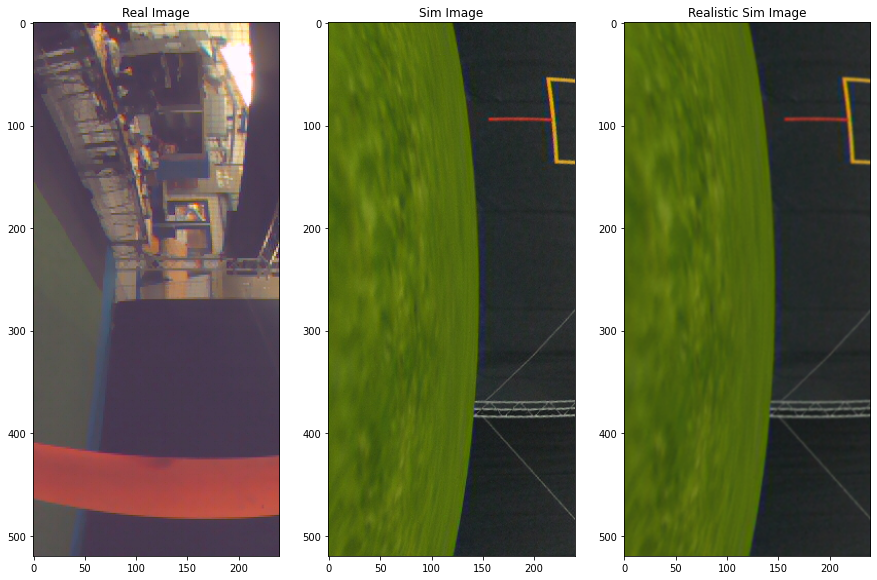

In [2]:
real_images_folder = 'real_images'
sim_images_folder = 'sim_images'

# Show an example of a real image, a sim image, and a realistic sim image
real_image_example = cv2.imread(os.path.join(real_images_folder, os.listdir(real_images_folder)[0]))
sim_image_example = cv2.imread(os.path.join(sim_images_folder, os.listdir(sim_images_folder)[0]))
realistic_sim_image_example = make_realistic(sim_image_example)

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(cv2.cvtColor(real_image_example, cv2.COLOR_BGR2RGB))
ax[0].set_title('Real Image')
ax[1].imshow(cv2.cvtColor(sim_image_example, cv2.COLOR_BGR2RGB))
ax[1].set_title('Sim Image')
ax[2].imshow(cv2.cvtColor(realistic_sim_image_example, cv2.COLOR_BGR2RGB))
ax[2].set_title('Realistic Sim Image')
plt.show()

In [3]:
# # generate depth maps
# generate_depth_images("vitb", real_images_folder)

# doesnt work now, done by hand

### Create labels
Based on the generated depth maps the images are classified

In [5]:
all_images_folder = 'all_images'
labeled_images = pd.DataFrame(columns=['filename', 'left', 'left_forward', 'forward', 'right_forward', 'right'])

labeled_images = generate_labels(real_images_folder, all_images_folder, labeled_images)
labeled_images = generate_labels(sim_images_folder, all_images_folder, labeled_images, realistic=True)

labeled_images.to_csv('labeled_images_3.csv', index=False)

Generating labels for images in real_images...


  0%|          | 0/6672 [00:00<?, ?it/s]

100%|██████████| 6672/6672 [01:59<00:00, 55.90it/s]


Generating labels for images in sim_images...


100%|██████████| 843/843 [00:15<00:00, 54.66it/s]


Now we have all the ingredients we need to train our CNN, time to hop over to the next notebook!